# Example Community Notebook

* Contributors: saitcakmak
* Last updated: Jan 12, 2024
* BoTorch version: 0.9.6(dev), commit hash: dccda59d8ef51d8074de82fdb5614bad2db0ee96

In this notebook, we utilize the example GP model with randomly generated data.

/Users/saitcakmak/botorch/botorch/models/utils/assorted.py:202: InputDataWarning: Input data is not standardized (mean = tensor([0.1225]), std = tensor([0.7601])). Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


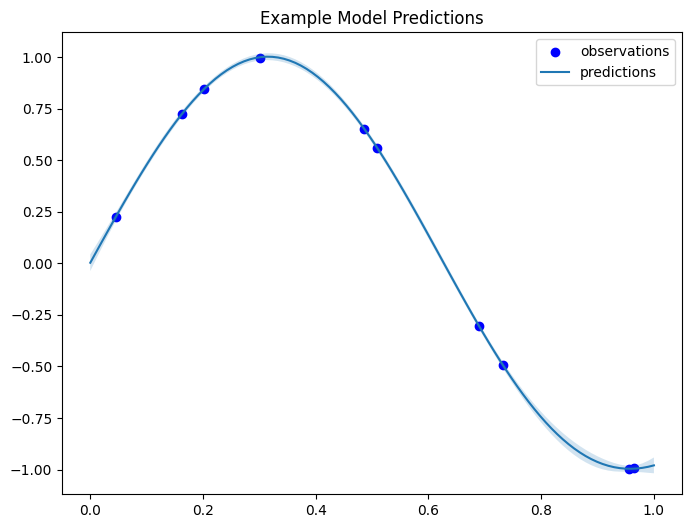

In [3]:
import matplotlib.pyplot as plt
import torch
from botorch_community.models.example import ExampleModel
from gpytorch import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll

torch.set_default_dtype(torch.float64)
X = torch.rand(10, 1)
Y = torch.sin(X*5)

model = ExampleModel(train_X=X, train_Y=Y)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)

test_X = torch.linspace(0, 1, 100)
with torch.no_grad():
    posterior = model.posterior(test_X.view(-1, 1))
mean, std = posterior.mean.squeeze(), posterior.variance.sqrt().squeeze()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
ax.set_title("Example Model Predictions")
ax.scatter(X, Y, c="b", label="observations")
ax.plot(test_X, mean, label="predictions")
ax.fill_between(test_X, mean-2*std, mean+2*std, alpha=0.2)
ax.legend()
plt.show()